In [1]:
import matplotlib.pyplot as plt

import torch

import math

# One sided distribution: importance calculation

Domains A and B contain classes [0-9]. They have have the following distributions:

In [2]:
# p_A = torch.Tensor([0.05, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
p_A = torch.Tensor([0.2, 0.8])
p_A /= p_A.sum()

# p_B = torch.Tensor([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
p_B = torch.Tensor([0.5, 0.5])
p_B /= p_B.sum()

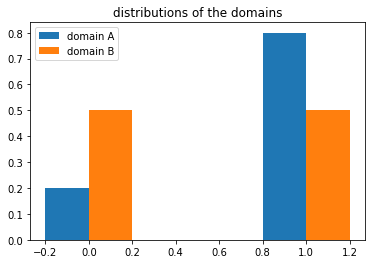

In [3]:
width = 0.2

plt.title('distributions of the domains')
plt.bar(torch.arange(len(p_A)) - width/2, p_A, width)
plt.bar(torch.arange(len(p_B)) + width/2, p_B, width)
plt.legend(['domain A', 'domain B'])
plt.show()

The importances for each of the classes for domain A is as following:

In [4]:
importances = p_B / p_A
importances /= importances.sum() # the importances need to sum to 1, hence why we divide by the sum

importances.view(-1,1)

tensor([[0.8000],
        [0.2000]])

The corrected distribution of domain A is the result of multiplying distribution A by the importances: 

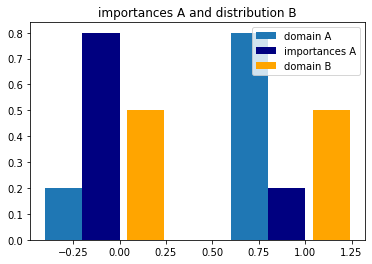

In [5]:
plt.title('importances A and distribution B')
plt.bar(torch.arange(len(p_A)) - 1.5*width, p_A, width)
plt.bar(torch.arange(len(p_A)) - 0.5*width, importances, width, color='navy')
plt.bar(torch.arange(len(p_B)) + 0.7*width, p_B, width, color='orange')

plt.legend(['domain A', 'importances A', 'domain B'])
plt.show()

In [6]:
corrected_p_A = importances * p_A
corrected_p_A /= corrected_p_A.sum() # the distribution needs to sum to 1, hence why we divide by the sum

corrected_p_A.view(-1,1)

tensor([[0.5000],
        [0.5000]])

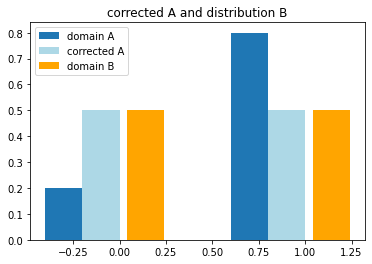

In [7]:
plt.title('corrected A and distribution B')
plt.bar(torch.arange(len(p_A)) - 1.5*width, p_A, width)
plt.bar(torch.arange(len(p_A)) - 0.5*width, corrected_p_A, width, color='lightblue')
plt.bar(torch.arange(len(p_B)) + 0.7*width, p_B, width, color='orange')

plt.legend(['domain A', 'corrected A', 'domain B'])
plt.show()

Let's make batches and test the loss function $f_0$

In [8]:
def generate_batch(probabilities, classes=torch.arange(len(p_A)), batch_size=100):
    batch = []

    for p, c in zip(probabilities, classes):
        batch+=[c.item()]*math.ceil(p*batch_size)

    return torch.Tensor(batch)

In [9]:
A = generate_batch(p_A, torch.arange(len(p_A)))
B = generate_batch(p_B, torch.arange(len(p_B)))

A, B

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [10]:
avg_A = A.mean()
avg_B = B.mean()

print('these are the average labels in the domains')
avg_A, avg_B

these are the average labels in the domains


(tensor(0.8000), tensor(0.5000))

In [11]:
importances_A = torch.Tensor(len(A))

for i in range(len(importances)):
    importances_A[A == i] = importances[i]

importances_A /= importances_A.sum() # normalize so sum=1
    
importances_A

tensor([0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
        0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
        0.0250, 0.0250, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062,
        0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062,
        0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062,
        0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062,
        0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062,
        0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062,
        0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062,
        0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062,
        0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062, 0.0062,
        0.0062])

In [12]:
# outcome should be 0 to correct for imbalance
(importances_A*A).sum() - B.mean()

tensor(-5.9605e-08)